<a href="https://colab.research.google.com/github/Rohan5076/practice-code/blob/main/assignment_rfm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
data =pd.read_excel("/content/drive/MyDrive/All CSV files-20220711T101939Z-001/All CSV files/Copy of Online Retail.xlsx")
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365.0,22752.0,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365.0,21730.0,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366.0,22633.0,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366.0,22632.0,HAND WARMER RED POLKA DOT,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367.0,84879.0,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# New Section

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


In [ ]:
data.drop(["StockCode","Description","Country"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   Quantity     541909 non-null  float64       
 2   InvoiceDate  541909 non-null  datetime64[ns]
 3   UnitPrice    541909 non-null  float64       
 4   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 20.7+ MB


In [ ]:
data.isna().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [ ]:
data.columns

Index(['InvoiceNo', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   Quantity     541909 non-null  float64       
 2   InvoiceDate  541909 non-null  datetime64[ns]
 3   UnitPrice    541909 non-null  float64       
 4   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 20.7+ MB


In [ ]:
data.Quantity.value_counts()

 1.0        148227
 2.0         81829
 12.0        61063
 6.0         40868
 4.0         38484
             ...  
-472.0           1
-161.0           1
-1206.0          1
-272.0           1
-80995.0         1
Name: Quantity, Length: 722, dtype: int64

In [ ]:
indexNames=data[data["Quantity"]<=0].index


In [ ]:
data.drop(data[data["Quantity"]<=0].index,inplace=True)

In [ ]:
data.Quantity.value_counts()

1.0        148227
2.0         81829
12.0        61063
6.0         40868
4.0         38484
            ...  
828.0           1
512.0           1
3100.0          1
291.0           1
80995.0         1
Name: Quantity, Length: 393, dtype: int64

In [ ]:
data.head(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365.0,6.0,2010-12-01 08:26:00,2.55,17850.0
1,536365.0,6.0,2010-12-01 08:26:00,3.39,17850.0
2,536365.0,8.0,2010-12-01 08:26:00,2.75,17850.0
3,536365.0,6.0,2010-12-01 08:26:00,3.39,17850.0
4,536365.0,6.0,2010-12-01 08:26:00,3.39,17850.0
5,536365.0,2.0,2010-12-01 08:26:00,7.65,17850.0
6,536365.0,6.0,2010-12-01 08:26:00,4.25,17850.0
7,536366.0,6.0,2010-12-01 08:28:00,1.85,17850.0
8,536366.0,6.0,2010-12-01 08:28:00,1.85,17850.0
9,536367.0,32.0,2010-12-01 08:34:00,1.69,13047.0


In [ ]:
data=data[['CustomerID','InvoiceNo','InvoiceDate','Quantity','UnitPrice']]
data.head(10)

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice
0,17850.0,536365.0,2010-12-01 08:26:00,6.0,2.55
1,17850.0,536365.0,2010-12-01 08:26:00,6.0,3.39
2,17850.0,536365.0,2010-12-01 08:26:00,8.0,2.75
3,17850.0,536365.0,2010-12-01 08:26:00,6.0,3.39
4,17850.0,536365.0,2010-12-01 08:26:00,6.0,3.39
5,17850.0,536365.0,2010-12-01 08:26:00,2.0,7.65
6,17850.0,536365.0,2010-12-01 08:26:00,6.0,4.25
7,17850.0,536366.0,2010-12-01 08:28:00,6.0,1.85
8,17850.0,536366.0,2010-12-01 08:28:00,6.0,1.85
9,13047.0,536367.0,2010-12-01 08:34:00,32.0,1.69


In [ ]:
data['Total']=data['Quantity']*data['UnitPrice']

In [ ]:
data.head(10)

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Total
0,17850.0,536365.0,2010-12-01 08:26:00,6.0,2.55,15.30
1,17850.0,536365.0,2010-12-01 08:26:00,6.0,3.39,20.34
2,17850.0,536365.0,2010-12-01 08:26:00,8.0,2.75,22.00
3,17850.0,536365.0,2010-12-01 08:26:00,6.0,3.39,20.34
4,17850.0,536365.0,2010-12-01 08:26:00,6.0,3.39,20.34
5,17850.0,536365.0,2010-12-01 08:26:00,2.0,7.65,15.30
6,17850.0,536365.0,2010-12-01 08:26:00,6.0,4.25,25.50
7,17850.0,536366.0,2010-12-01 08:28:00,6.0,1.85,11.10
8,17850.0,536366.0,2010-12-01 08:28:00,6.0,1.85,11.10
9,13047.0,536367.0,2010-12-01 08:34:00,32.0,1.69,54.08


In [ ]:
data.to_csv('for_rfm_data.csv', index=False)

In [ ]:
data.head(10)

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Total
0,17850.0,536365.0,2010-12-01 08:26:00,6.0,2.55,15.30
1,17850.0,536365.0,2010-12-01 08:26:00,6.0,3.39,20.34
2,17850.0,536365.0,2010-12-01 08:26:00,8.0,2.75,22.00
3,17850.0,536365.0,2010-12-01 08:26:00,6.0,3.39,20.34
4,17850.0,536365.0,2010-12-01 08:26:00,6.0,3.39,20.34
5,17850.0,536365.0,2010-12-01 08:26:00,2.0,7.65,15.30
6,17850.0,536365.0,2010-12-01 08:26:00,6.0,4.25,25.50
7,17850.0,536366.0,2010-12-01 08:28:00,6.0,1.85,11.10
8,17850.0,536366.0,2010-12-01 08:28:00,6.0,1.85,11.10
9,13047.0,536367.0,2010-12-01 08:34:00,32.0,1.69,54.08


In [ ]:
data.to_csv('for_rfm.csv',index=False)

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'] = data['InvoiceDate'].dt.date
data.head(10)

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Total
0,17850.0,536365.0,2010-12-01,6.0,2.55,15.30
1,17850.0,536365.0,2010-12-01,6.0,3.39,20.34
2,17850.0,536365.0,2010-12-01,8.0,2.75,22.00
3,17850.0,536365.0,2010-12-01,6.0,3.39,20.34
4,17850.0,536365.0,2010-12-01,6.0,3.39,20.34
5,17850.0,536365.0,2010-12-01,2.0,7.65,15.30
6,17850.0,536365.0,2010-12-01,6.0,4.25,25.50
7,17850.0,536366.0,2010-12-01,6.0,1.85,11.10
8,17850.0,536366.0,2010-12-01,6.0,1.85,11.10
9,13047.0,536367.0,2010-12-01,32.0,1.69,54.08


In [ ]:
data.to_csv('for_rfm2.csv',index=False)

In [ ]:
'''--SELECT * FROM for_rfm2 LIMIT 5000
WITH dataset as(
        SELECT 
            for_rfm2.invoiceno,
            customerid,
            Quantity, InvoiceDate, UnitPrice,
            total
            FROM for_rfm2
),
--SELECT 
--    invoiceno,
--    customerid, 
--    InvoiceDate,
--    total,
--        COUNT(invoiceno) OVER(PARTITION BY customerid,invoiceno)
--FROM dataset
Order_Summary as (  
        SELECT 
                customerid, invoiceno, invoicedate,
                SUM(total) AS   total_sales 
            FROM dataset
            GROUP BY customerid , invoiceno, invoicedate
)
SELECT
Customerid, invoiceno ,invoicedate ,
--(SELECT MAX(invoicedate) FROM order_summary WHERE customerid = customerid) AS max_order_date ,
--(SELECT MAX(invoicedate) FROM order_summary WHERE customerid = customerid) as max_customer_order_date ,
DATE_DIFF ((SELECT MAX(invoicedate) FROM for_rfm2),( SELECT MAX(invoicedate) FROM order_summary WHERE customerid = customerid ) , 'DAY' ) as Recency,
COUNT (invoiceno) as Frequency,
SUM(total_sales) as monetary

FROM order_summary 
Group BY customerid , invoiceno, invoicedate 
ORDER BY 1, 3 DESC'''


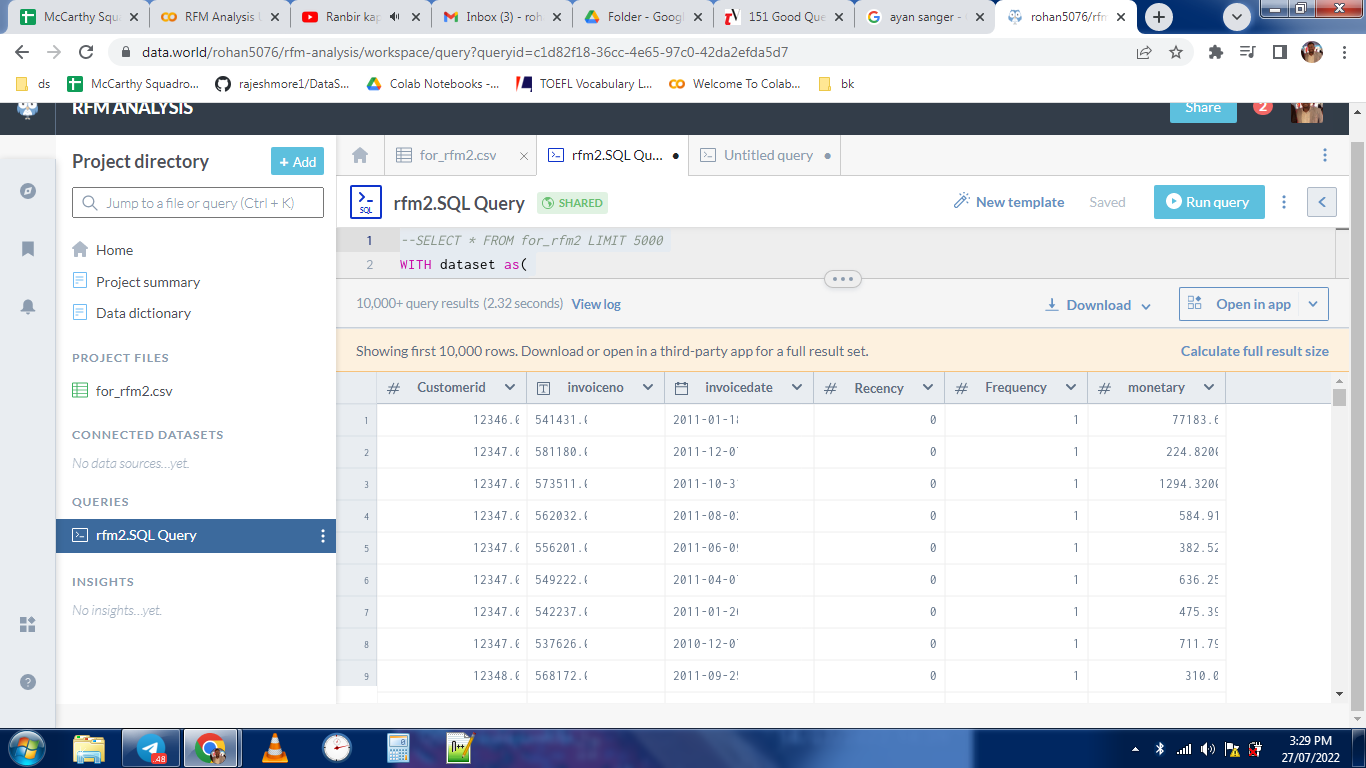

In [ ]:
'''
WITH dataset AS(
  SELECT 
    for_rfm2.invoiceno,
    customerid,
    Quantity, InvoiceDate, UnitPrice,
     Total
    FROM for_rfm2
),

--step 2 : exam the dataset 

--SELECT 
  --  invoiceno,
  --  customerid, 
  --  InvoiceDate,
  --  Total
  --      COUNT(online_retail_new_1.invoiceno) OVER(PARTITION BY customerid,online_retail_new_1.invoiceno)
--FROM dataset  

-- step 3 : summarize dataset
Order_Summary as (
SELECT 
      customerid, invoiceno, invoicedate,
      SUM(total) AS   total_sales 
    FROM dataset
    GROUP BY customerid , invoiceno, invoicedate
)
-- /** step 4 : Put together the RFM Report **/
SELECT
Customerid,-- invoiceno ,invoicedate,
--(SELECT MIN(invoicedate) FROM order_summary) as min_order_date ,
--(SELECT MAX(invoicedate) FROM order_summary WHERE customerid = customerid) as max_customer_order_date ,
DATE_DIFF ((SELECT MIN(invoicedate) FROM order_summary),
( SELECT MAX(invoicedate) FROM order_summary WHERE customerid = customerid ) , 'DAY' ) as Recency ,
COUNT (invoiceno) as Frequency,
SUM(total_sales) as monetary

FROM order_summary 
Group BY customerid
ORDER BY 1, 3 DESC'''

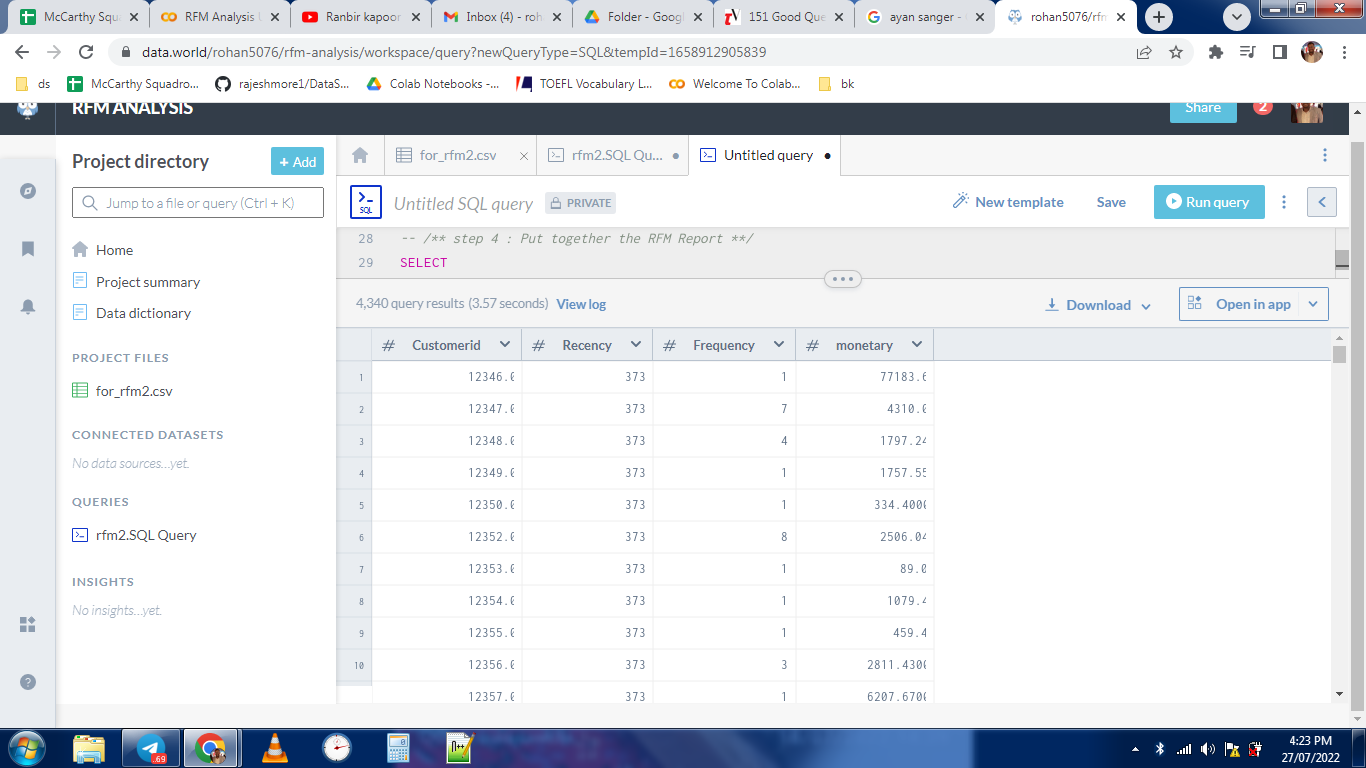